In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
dfNJ = df[df.state == 'New Jersey']
dfLTCNJ = pd.read_excel('LTC_Facilities_Outbreaks_List.xlsx', sheet_name='Table 1', skiprows=5)

In [3]:
dfNJ = df[df.state == 'New Jersey'].copy()
dfNJFull = dfNJ.sort_values(by=['county', 'date']).copy()
#df['dA'] = df['A'] - df['A'].shift(-1)
dfNJ.rename(columns={'county': 'County'}, inplace=True)

In [4]:
def diffCounty(deaths, prevDeaths, county, prevCounty):
    if county == prevCounty:
        return deaths - prevDeaths
    else:
        return 0

dfNJFull['newDeaths'] = dfNJFull['deaths'] - dfNJFull['deaths'].shift(1)

In [5]:
dfNJFull['newDeaths'].fillna(0, inplace=True)
#dfNJFull['newDeaths'] = 

In [6]:
# for county in dfNJFull.county.unique():
#     countyDF = dfNJFull[dfNJFull.county == county]
#     minDate = countyDF.date.min()
#     countyDF[countyDF.date == minDate]['newDeaths'] = 0
#     #print(countyDF.head(3))  

In [7]:
maxDate = dfNJ.date.max()
dfNJ = dfNJ[dfNJ.date == maxDate]

In [8]:
dfNJCounty = dfNJ.groupby(by=['County', 'fips']).sum()
dfNJCounty

,,cases,deaths
County,fips,,
Atlantic,34001.0,2120,156
Bergen,34003.0,18158,1553
Burlington,34005.0,4476,277
Camden,34007.0,6292,318
Cape May,34009.0,602,48
Cumberland,34011.0,2146,65
Essex,34013.0,17450,1628
Gloucester,34015.0,2165,143
Hudson,34017.0,18226,1161


In [9]:
dfLTCCounty = dfLTCNJ.groupby(by=['County']).sum()
dfLTCCounty.rename(columns={'Number of COVID\nConfirmed Residents': 'LTC Resident Cases', 
                            'Number of COVID\nConfirmed Staff': 'LTC Staff Cases',
                            'Number of COVID\nConfirmed Deaths among Residents': 'LTC Resident Deaths',
                            'Number of COVID Confirmed Deaths among Staff': 'LTC Staff Deaths'}, inplace=True)
dfLTCCounty

,LTC Resident Cases,LTC Staff Cases,LTC Resident Deaths,LTC Staff Deaths
County,,,,
Atlantic,579,229,116,1
Bergen,3033,1480,897,10
Burlington,1253,629,223,4
Camden,1092,358,232,3
Cape_May,187,135,38,0
Cumberland,268,172,31,1
Essex,2025,870,533,19
Gloucester,437,214,110,2
Hudson,713,409,187,7


In [10]:
dfNJ_w_LTC_df = dfLTCCounty.join(dfNJCounty)
dfNJ_w_LTC_df['LTC Deaths'] = dfNJ_w_LTC_df['LTC Resident Deaths'] + dfNJ_w_LTC_df['LTC Staff Deaths']
dfNJ_w_LTC_df['Deaths Non LTC'] = dfNJ_w_LTC_df['deaths'] - dfNJ_w_LTC_df['LTC Deaths']
dfNJ_w_LTC_df['LTC Cases'] = dfNJ_w_LTC_df['LTC Resident Cases'] + dfNJ_w_LTC_df['LTC Staff Cases']
dfNJ_w_LTC_df['Cases Non LTC'] = dfNJ_w_LTC_df['cases'] - dfNJ_w_LTC_df['LTC Cases']
dfNJ_w_LTC_df['% Deaths LTC'] = dfNJ_w_LTC_df['LTC Deaths'] / dfNJ_w_LTC_df['deaths']

In [11]:
dfNJ_w_LTC_df.sort_values(by=['deaths'], ascending=False, inplace=True)
dfNJ_w_LTC_df.head(2)

,,LTC Resident Cases,LTC Staff Cases,LTC Resident Deaths,LTC Staff Deaths,cases,deaths,LTC Deaths,Deaths Non LTC,LTC Cases,Cases Non LTC,% Deaths LTC
County,fips,,,,,,,,,,,
Essex,34013.0,2025,870,533,19,17450,1628,552,1076,2895,14555,0.339066
Bergen,34003.0,3033,1480,897,10,18158,1553,907,646,4513,13645,0.584031


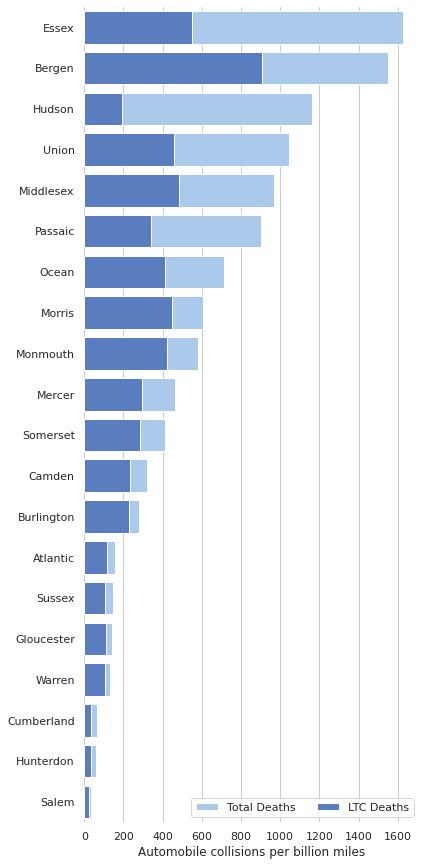

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
import seaborn as sns

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="deaths", y="County", data=dfNJ_w_LTC_df.reset_index(),
            label="Total Deaths", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="LTC Deaths", y="County", data=dfNJ_w_LTC_df.reset_index(),
            label="LTC Deaths", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [15]:
import altair as alt
from vega_datasets import data

source = dfNJFull

alt.Chart(source).mark_area().encode(
    x = 'date',
    y='deaths',
    facet=alt.Facet('county:O', columns=4),
).properties(
    width=200,
    height=100,
)

alt.Chart(...)

In [19]:
dfNJ_w_LTC_df.reset_index()[['County', '']].melt()

,County,fips,LTC Resident Cases,LTC Staff Cases,LTC Resident Deaths,LTC Staff Deaths,cases,deaths,LTC Deaths,Deaths Non LTC,LTC Cases,Cases Non LTC,% Deaths LTC
0,Essex,34013.0,2025,870,533,19,17450,1628,552,1076,2895,14555,0.339066
1,Bergen,34003.0,3033,1480,897,10,18158,1553,907,646,4513,13645,0.584031
2,Hudson,34017.0,713,409,187,7,18226,1161,194,967,1122,17104,0.167097
3,Union,34039.0,1296,574,450,10,15475,1047,460,587,1870,13605,0.439351
4,Middlesex,34023.0,1571,739,475,7,15633,968,482,486,2310,13323,0.497934
5,Passaic,34031.0,1096,639,327,13,15959,903,340,563,1735,14224,0.376523
6,Ocean,34029.0,1710,749,409,2,8577,711,411,300,2459,6118,0.578059
7,Morris,34027.0,1307,600,445,3,6354,605,448,157,1907,4447,0.740496
8,Monmouth,34025.0,1548,705,418,5,8012,578,423,155,2253,5759,0.731834
9,Mercer,34021.0,1051,499,289,3,6670,462,292,170,1550,5120,0.632035


In [53]:
import altair as alt
from vega_datasets import data
df1=dfNJ_w_LTC_df.sort_values(by=['deaths'], ascending=False).reset_index()
cols = ['Deaths Non LTC', 'LTC Deaths']
#cols = ['LTC Deaths', 'Deaths Non LTC']
source = pd.melt(df1, id_vars =['County'], value_vars =cols) 

alt.Chart(source).mark_bar().encode(
    x='value',
#     y='County',
    y=alt.Y('County:N', sort='-x'),
    color=alt.Color('variable', scale=alt.Scale(scheme='category20c'))
)

alt.Chart(...)

In [37]:
df1

,County,fips,LTC Resident Cases,LTC Staff Cases,LTC Resident Deaths,LTC Staff Deaths,cases,deaths,LTC Deaths,Deaths Non LTC,LTC Cases,Cases Non LTC,% Deaths LTC
0,Essex,34013.0,2025,870,533,19,17450,1628,552,1076,2895,14555,0.339066
1,Bergen,34003.0,3033,1480,897,10,18158,1553,907,646,4513,13645,0.584031
2,Hudson,34017.0,713,409,187,7,18226,1161,194,967,1122,17104,0.167097
3,Union,34039.0,1296,574,450,10,15475,1047,460,587,1870,13605,0.439351
4,Middlesex,34023.0,1571,739,475,7,15633,968,482,486,2310,13323,0.497934
5,Passaic,34031.0,1096,639,327,13,15959,903,340,563,1735,14224,0.376523
6,Ocean,34029.0,1710,749,409,2,8577,711,411,300,2459,6118,0.578059
7,Morris,34027.0,1307,600,445,3,6354,605,448,157,1907,4447,0.740496
8,Monmouth,34025.0,1548,705,418,5,8012,578,423,155,2253,5759,0.731834
9,Mercer,34021.0,1051,499,289,3,6670,462,292,170,1550,5120,0.632035


In [21]:
source.head(3)

,yield,variety,year,site
0,27.00000,Manchuria,1931,University Farm
1,48.86667,Manchuria,1931,Waseca
2,27.43334,Manchuria,1931,Morris


In [27]:
pd.melt(dfNJ_w_LTC_df.reset_index(), id_vars =['County'], value_vars =['deaths', 'LTC Deaths']) 

,County,variable,value
0,Essex,deaths,1628
1,Bergen,deaths,1553
2,Hudson,deaths,1161
3,Union,deaths,1047
4,Middlesex,deaths,968
5,Passaic,deaths,903
6,Ocean,deaths,711
7,Morris,deaths,605
8,Monmouth,deaths,578
9,Mercer,deaths,462


In [25]:
dfNJ_w_LTC_df.columns

Index(['LTC Resident Cases', 'LTC Staff Cases', 'LTC Resident Deaths',
       'LTC Staff Deaths', 'cases', 'deaths', 'LTC Deaths', 'Deaths Non LTC',
       'LTC Cases', 'Cases Non LTC', '% Deaths LTC'],
      dtype='object')